# Corto 1 
## Marlon Tzorin - 20180072

In [69]:
import warnings
warnings.filterwarnings(action='ignore')

In [70]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('dat.csv')

In [72]:
df.columns = ["A", "B", "C"]
df.head(3)

,A,B,C
0,0.796997,50.312938,2532.026902
1,1.115603,50.156194,2516.888332
2,1.064629,50.774814,2579.215190


In [73]:
df['A2'] = df['A'] ** 2
df['A3'] = df['A'] ** 3
df['A4'] = df['A'] ** 4
df['A5'] = df['A'] ** 5

df['B2'] = df['B'] ** 2
df['B3'] = df['B'] ** 3
df['B4'] = df['B'] ** 4
df['B5'] = df['B'] ** 5

In [74]:
df['cons'] = 1
y = df[['C']].to_numpy()
X = df[['cons','A','A2','B','B2']].to_numpy()

In [75]:
def linear_cost(X, y, theta): 
    h = X @ theta
    return ((y-h)**2).sum() / (2 * len(X))

In [76]:
def linear_cost_gradient(X, y, theta): 
    h = X @ theta
    return (X.T @ (h-y))/ len(X)

In [77]:
def gradient_descent(X, y, theta_0, linear_function, linear_gradient, 
                     learning_rate=0.0000000000000000001, threshold= 0.0000000001, max_iter=10000, lamb = 10, n = 0):
    theta = theta_0
    iteration = 0
    costs = []
    thetas = []

    while np.linalg.norm(linear_gradient(X, y, theta)) > threshold and iteration < max_iter:
        iteration += 1
        n += 1
        theta = theta - learning_rate * (linear_gradient(X, y, theta) + lamb * theta)
        costs.append(linear_function(X, y, theta))
        thetas.append(theta.copy())
    return theta, costs, thetas

In [78]:
m, n = X.shape
theta_0 = np.random.rand(n,1)
np.random.shuffle(X)
np.random.shuffle(y)

In [79]:
print(y.shape, X.shape)

(159999, 1) (159999, 5)


In [80]:
X_train = X[:96000]
X_cv = X[96000:128000]
X_test = X[128000:159999]
y_train = y[:96000]
y_cv = y[96000:128000]
y_test = y[128000:159999]

In [81]:
theta, costs, thetas = gradient_descent(X_train,y_train,theta_0,linear_cost,linear_cost_gradient,0.00000000000001,0.001,50,2)

In [82]:
print(costs[len(costs)-1])

119042786.58681072


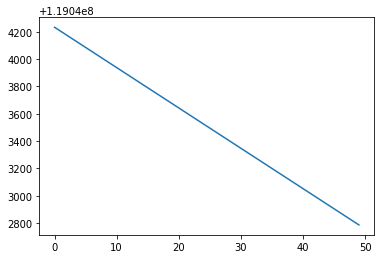

In [83]:
plt.plot(costs)

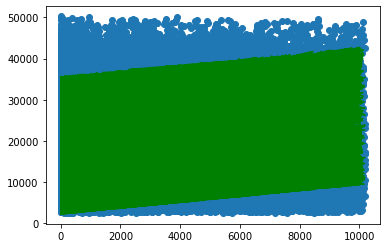

In [84]:
plt.scatter(X_test[:, 2], y_test)
plt.plot(X_test[:, 2], X_test @ theta, color='green')
plt.show()

In [85]:
y2 = df[['C']].to_numpy()
X2 = df[['cons','A','A2','A3','B','B2','B3']].to_numpy()
np.random.shuffle(X2)
np.random.shuffle(y2)

In [86]:
X2_train = X2[:96000]
X2_cv = X2[96000:128000]
X2_test = X2[128000:159999]
y2_train = y2[:96000]
y2_cv = y2[96000:128000]
y2_test = y2[128000:159999]
m, n = X2.shape
theta_02 = np.random.rand(n,1)

In [109]:
theta2, costs2, thetas2 = gradient_descent(X2_train,y2_train,theta_02,linear_cost,linear_cost_gradient,0.0000000000000001,0.000000001,10000,2)

In [110]:
print(costs2[len(costs2)-1])

24017384669.082058


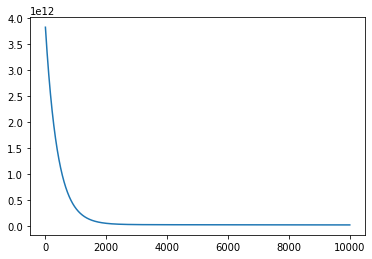

In [111]:
plt.plot(costs2)

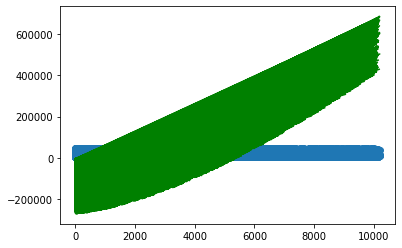

In [112]:
plt.scatter(X2_test[:, 2], y2_test)
plt.plot(X2_test[:, 2], X2_test @ theta2, color='green')
plt.show()

In [93]:
cv_cost = linear_cost(X2_cv,y2_cv, theta2)
print(cv_cost)

23877838426.439484


# Preguntas y Respuetas

## El grado del polinomio elegido
### el grado de polinomio elegido es el polinomio 3 
## El lambda utilizado para regularizar
### el lamba utilizado para poder regularizar el comportamiento es de 2 

### Debido al bias que se puede denotar en las graficas sirvio usar el lambada de 2 para poder regularizar los polinomios , de esta manera el mejor polinomio seria de grado 3 